# ML class final project part3
##  Almog Shor
## Yehudit Brickner

imports

In [1]:
import os
import cv2 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import time

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

create the data set with all of the features

In [2]:
def create_df1(folder):

    folder_dir= os.listdir(folder)
    
    big_list=[]
    my_list=[]
    count=0
    c=0
    for i in folder_dir:
        print(i)
        j = os.listdir(folder+"/"+i)
        if i in ['american_football','basketball','hockey_puck','shuttlecock']:
            for k in range(len(j)):
                try:
                    img = cv2.imread(folder+"/"+i+"/"+j[k], cv2.COLOR_BGR2RGB)
                    img = cv2.resize(img,(200,200), interpolation = cv2.INTER_AREA)
                    
                    # histogram_r, bin_edges = np.histogram(img[:, :, 0], bins=256, range=(0, 256)) 
                    # histogram_g, bin_edges = np.histogram(img[:, :, 1], bins=256, range=(0, 256)) 
                    # histogram_b, bin_edges = np.histogram(img[:, :, 2], bins=256, range=(0, 256)) 
                    
                    # dst = cv2.Canny(img, 50, 200, None, 3)
                    # dst1 = cv2.Canny(img, 50, 200, None, 3)
                    # lines = cv2.HoughLines(dst1, 1, np.pi / 180, 50, None, 0, 0)
                    
                    # gray = cv2.imread(folder+"/"+i+"/"+j[k],cv2.IMREAD_GRAYSCALE)
                    # gray =  cv2.resize(gray,(200,200), interpolation = cv2.INTER_AREA)
                    # gray = cv2.medianBlur(gray, 5)
                    # rows = gray.shape[0]
                    # circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, rows / 8,
                    #                 param1=100, param2=30,
                    #                 minRadius=10, maxRadius=100)
                    
                    my_list=[]
                    my_list.append(folder+"/"+i+"/"+j[k])
                    my_list.append(i)
                    my_list.append(c)
                    # if lines is None:
                    #     my_list.append(0)
                    #     my_list.append(0)   
                    # else:
                    #     my_list.append(1)
                    #     my_list.append(len(lines))
                    # if circles is None:
                    #     my_list.append(0)
                    #     my_list.append(0)   
                    # else:
                    #     my_list.append(1)
                    #     my_list.append(circles.shape[1])
                    
                    # my_list.extend(histogram_r)
                    # my_list.extend(histogram_g)
                    # my_list.extend(histogram_b)
                    my_list.extend(img.flatten())
                    # my_list.extend(dst.flatten())

                    big_list.append(my_list)
                    count+=1
                    
                except:
                    print("there was an error with count ",count)

        c+=1

    
    print("creating df")
    # cols = ['path','class_name','class_number','lines?','#lines','circles?','#circles']
    cols = ['path','class_name','class_number']
    # for h in range(256):
    #     cols.append("r"+str(h))
    # for h in range(256):
    #     cols.append("g"+str(h))
    # for h in range(256):
    #     cols.append("b"+str(h))
    for h in range(200*200*3):
        cols.append("i"+str(h))
    # for h in range(200*200):
    #     cols.append("e"+str(h))

    df = pd.DataFrame(big_list, columns = cols) 

    print("created df")
              
    return df

In [3]:
# folder ="C:/Users/nechd/Downloads/ball_classification/train"
# start_time = time.time()
# full_ball_edge_df = create_df1(folder) 
# end_time = time.time()
# print("time taken: ",end_time - start_time)

In [4]:
# full_ball_edge_df.shape
# full_ball_edge_df.head()

In [5]:
# full_ball_edge_df.to_csv('image.csv', index=False)

In [6]:
# folder ="C:/Users/nechd/Downloads/ball_classification/test"
# start_time = time.time()
# full_test_df = create_df1(folder) 
# end_time = time.time()
# print("time taken: ",end_time - start_time)

In [7]:
# full_test_df.to_csv('final_test_data_image.csv', index=False)

import the data with some/all features

In [8]:
image = pd.read_csv('image.csv')
del image['path']
del image['class_name']
ball_type = [0,2,9,11]
edge_4balls = image.loc[image['class_number'].isin(ball_type)]
print(edge_4balls.shape)
edge_4balls_no_na = edge_4balls.dropna()
print(edge_4balls_no_na.shape)

(1543, 120001)
(1533, 120001)


In [9]:
X = edge_4balls_no_na.drop(['class_number'], axis=1)
y = edge_4balls_no_na['class_number']

train test split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
pca1=PCA(n_components=0.9)
X_train6=pca1.fit_transform(X_train)
X_test6=pca1.transform(X_test)
y_train6 = y_train
y_test6 = y_test

print(X_train6.shape)
print(X_test6.shape)

(1073, 146)
(460, 146)


extra functions

In [12]:
# function to represent the confusion matrix nicely
def Confusion_Matrix(cf_matrix):
    plt.figure(figsize=(6,6))
    sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Greens')

In [13]:
# list to hold all final results
results=[]

model imports

In [14]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression



# RUN ON DATA SET OF IMAGE PCA 0.9

#### SVM

In [15]:
losses = ["hinge","squared_hinge"]
penalties = ["l1","l2"]

print("OneVsOneClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OneVsOneClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train6, y_train6)
            pred_svm = svm.predict(X_test6)
            print(i,j,round(np.sum([y_test6==pred_svm])/len(y_test6),4)*100,"%")
        except:
            pass

print("OutputCodeClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OutputCodeClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train6, y_train6)
            pred_svm = svm.predict(X_test6)
            print(i,j,round(np.sum([y_test6==pred_svm])/len(y_test6),4)*100,"%")
        except:
            pass


print("OneVsRestClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OneVsRestClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train6, y_train6)
            pred_svm = svm.predict(X_test6)
            print(i,j,round(np.sum([y_test6==pred_svm])/len(y_test6),4)*100,"%")
        except:
            pass

OneVsOneClassifier
hinge l2 47.61 %
squared_hinge l2 47.61 %
OutputCodeClassifier
hinge l2 43.04 %
squared_hinge l2 31.96 %
OneVsRestClassifier
hinge l2 47.39 %
squared_hinge l2 47.39 %


              precision    recall  f1-score   support

           0       0.44      0.51      0.47       110
           2       0.26      0.33      0.29       100
           9       0.00      0.00      0.00       111
          11       0.45      0.66      0.54       139

    accuracy                           0.39       460
   macro avg       0.29      0.38      0.32       460
weighted avg       0.30      0.39      0.34       460

39.35 %


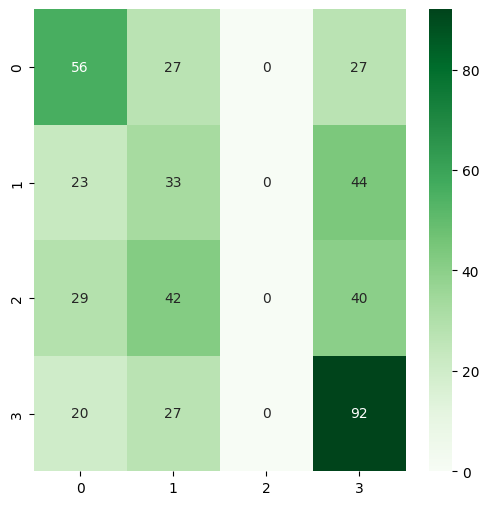

In [16]:
svm6 =  OutputCodeClassifier(LinearSVC(random_state=0, loss="hinge",penalty="l2")).fit(X_train6, y_train6)
pred_svm6 = svm6.predict(X_test6)
Confusion_Matrix(confusion_matrix(y_test6,pred_svm6))
print(classification_report(y_test6, pred_svm6))
print(round(np.sum([y_test6==pred_svm6])/len(y_test6),4)*100,"%")
results.append(['images PCA 0.9', 'SVM',round(np.sum([y_test6==pred_svm6])/len(y_test6),4)*100 ])

#### KNN

In [17]:
for i in range(1,51):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train6,y_train6)
    pred_knn = neigh.predict(X_test6)
    print(i,round(np.sum([y_test6==pred_knn])/len(y_test6),4)*100,"%")

1 60.42999999999999 %
2 55.87 %
3 56.52 %
4 53.7 %
5 52.83 %
6 53.04 %
7 55.22 %
8 55.22 %
9 56.52 %
10 57.60999999999999 %
11 56.3 %
12 55.87 %
13 55.43 %
14 55.22 %
15 53.910000000000004 %
16 55.00000000000001 %
17 55.00000000000001 %
18 55.00000000000001 %
19 54.35 %
20 53.910000000000004 %
21 54.35 %
22 55.65 %
23 55.43 %
24 55.43 %
25 56.089999999999996 %
26 56.089999999999996 %
27 55.00000000000001 %
28 55.00000000000001 %
29 54.13 %
30 54.56999999999999 %
31 54.56999999999999 %
32 55.22 %
33 53.910000000000004 %
34 54.56999999999999 %
35 54.56999999999999 %
36 54.779999999999994 %
37 54.779999999999994 %
38 54.779999999999994 %
39 54.56999999999999 %
40 54.56999999999999 %
41 54.35 %
42 54.56999999999999 %
43 54.56999999999999 %
44 54.56999999999999 %
45 54.13 %
46 53.910000000000004 %
47 53.04 %
48 51.959999999999994 %
49 52.61 %
50 52.39 %


              precision    recall  f1-score   support

           0       0.58      0.57      0.58       110
           2       0.62      0.60      0.61       100
           9       0.56      0.48      0.51       111
          11       0.64      0.73      0.68       139

    accuracy                           0.60       460
   macro avg       0.60      0.60      0.60       460
weighted avg       0.60      0.60      0.60       460

60.42999999999999 %


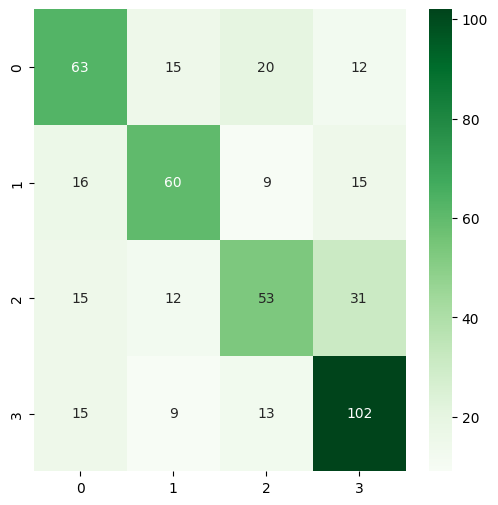

In [18]:
neigh6 = KNeighborsClassifier(n_neighbors=1)
neigh6.fit(X_train6,y_train6)
pred_knn6 = neigh6.predict(X_test6)
Confusion_Matrix(confusion_matrix(y_test6,pred_knn6))
print(classification_report(y_test6, pred_knn6))
print(round(np.sum([y_test6==pred_knn6])/len(y_test6),4)*100,"%")
results.append(['images PCA 0.9', 'KNN',round(np.sum([y_test6==pred_knn6])/len(y_test6),4)*100 ])

#### Adaboost

In [19]:
for i in range(50,2001,50):
    ada = AdaBoostClassifier(n_estimators=i, algorithm="SAMME", random_state=0)
    ada.fit(X_train6,y_train6)
    pred_ada = ada.predict(X_test6)
    print(i,round(np.sum([y_test6==pred_ada])/len(y_test6),4)*100,"%")

50 49.57 %
100 48.26 %
150 51.959999999999994 %
200 52.83 %
250 52.39 %
300 53.7 %
350 53.7 %
400 53.7 %
450 53.910000000000004 %
500 52.61 %
550 54.13 %
600 54.13 %
650 55.22 %
700 54.56999999999999 %
750 54.13 %
800 53.26 %
850 53.04 %
900 53.480000000000004 %
950 53.04 %
1000 53.26 %
1050 53.26 %
1100 55.00000000000001 %
1150 55.43 %
1200 54.56999999999999 %
1250 54.779999999999994 %
1300 55.00000000000001 %
1350 53.910000000000004 %
1400 55.22 %
1450 54.13 %
1500 52.83 %
1550 53.26 %
1600 54.35 %
1650 54.779999999999994 %
1700 54.56999999999999 %
1750 54.779999999999994 %
1800 54.13 %
1850 54.56999999999999 %
1900 54.35 %
1950 54.56999999999999 %
2000 54.13 %


              precision    recall  f1-score   support

           0       0.47      0.56      0.51       110
           2       0.53      0.50      0.52       100
           9       0.46      0.41      0.44       111
          11       0.72      0.70      0.71       139

    accuracy                           0.55       460
   macro avg       0.55      0.54      0.54       460
weighted avg       0.56      0.55      0.55       460

55.43 %


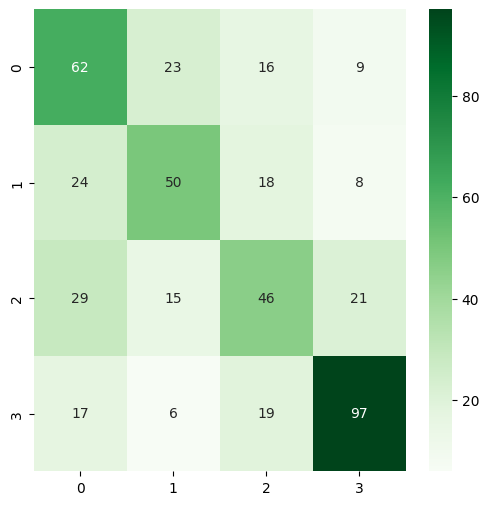

In [20]:
ada6 = AdaBoostClassifier(n_estimators=1150, algorithm="SAMME",random_state=0)
ada6.fit(X_train6,y_train6)
pred_ada6 = ada6.predict(X_test6)
Confusion_Matrix(confusion_matrix(y_test6,pred_ada6))
print(classification_report(y_test6, pred_ada6))
print(round(np.sum([y_test6==pred_ada6])/len(y_test6),4)*100,"%")
results.append(['images PCA 0.9', 'Adaboost',round(np.sum([y_test6==pred_ada6])/len(y_test6),4)*100 ])

#### Random Forest

In [21]:
for i in range(40,501,20):
    for j in range(2,5):
        RF = RandomForestClassifier(n_estimators=i, max_depth=None,min_samples_split=j, random_state=0)
        RF.fit(X_train6,y_train6)
        pred_RF = RF.predict(X_test6)
        print(i,j,round(np.sum([y_test6==pred_RF])/len(y_test6),4)*100,"%")

40 2 57.17 %
40 3 61.09 %
40 4 58.699999999999996 %
60 2 57.38999999999999 %
60 3 61.739999999999995 %
60 4 60.0 %
80 2 60.22 %
80 3 61.96 %
80 4 60.42999999999999 %
100 2 60.22 %
100 3 61.96 %
100 4 60.870000000000005 %
120 2 61.3 %
120 3 62.61 %
120 4 62.61 %
140 2 63.04 %
140 3 64.13 %
140 4 62.61 %
160 2 64.35 %
160 3 66.09 %
160 4 63.04 %
180 2 62.83 %
180 3 64.57000000000001 %
180 4 62.61 %
200 2 62.61 %
200 3 64.57000000000001 %
200 4 62.39 %
220 2 64.13 %
220 3 65.0 %
220 4 62.17 %
240 2 63.480000000000004 %
240 3 65.22 %
240 4 62.61 %
260 2 62.39 %
260 3 65.22 %
260 4 62.83 %
280 2 63.260000000000005 %
280 3 66.3 %
280 4 62.17 %
300 2 62.83 %
300 3 66.74 %
300 4 62.83 %
320 2 63.7 %
320 3 66.09 %
320 4 62.83 %
340 2 63.260000000000005 %
340 3 66.96 %
340 4 62.83 %
360 2 63.04 %
360 3 66.96 %
360 4 63.91 %
380 2 62.83 %
380 3 66.09 %
380 4 63.91 %
400 2 62.83 %
400 3 66.3 %
400 4 65.0 %
420 2 63.480000000000004 %
420 3 66.3 %
420 4 64.78 %
440 2 64.13 %
440 3 66.09 %
440 4 64.3

              precision    recall  f1-score   support

           0       0.57      0.76      0.65       110
           2       0.76      0.55      0.64       100
           9       0.69      0.52      0.59       111
          11       0.71      0.80      0.75       139

    accuracy                           0.67       460
   macro avg       0.68      0.66      0.66       460
weighted avg       0.68      0.67      0.67       460

66.96 %


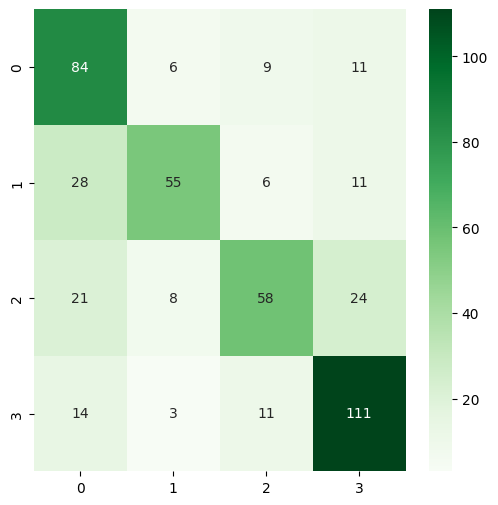

In [22]:
RF6 = RandomForestClassifier(n_estimators=340, max_depth=None,min_samples_split=3, random_state=0)
RF6.fit(X_train6,y_train6)
pred_RF6 = RF6.predict(X_test6)
Confusion_Matrix(confusion_matrix(y_test6,pred_RF6))
print(classification_report(y_test6, pred_RF6))
print(round(np.sum([y_test6==pred_RF6])/len(y_test6),4)*100,"%")
results.append(['images PCA 0.9', 'Random Forest',round(np.sum([y_test6==pred_RF6])/len(y_test6),4)*100 ])

#### Logistic Regression

In [23]:
penilties = ["l1","l2","elasticnet"]
solvers = ["lbfgs","liblinear","newton-cg","newton-cholesky","sag","saga"]
tols= [0.1 ,0.01, 0.001]

for i in penilties:
    for j in solvers:
        for k in tols:
            try:
                LR = LogisticRegression(penalty=i, solver=j, tol=k, max_iter=10000,random_state=0)
                LR.fit(X_train6,y_train6)
                pred_LR = LR.predict(X_test6)
                print(i,j,k,round(np.sum([y_test6==pred_LR])/len(y_test6),4)*100,"%")
            except:
                pass
        

l1 liblinear 0.1 54.13 %
l1 liblinear 0.01 54.779999999999994 %
l1 liblinear 0.001 55.00000000000001 %
l1 saga 0.1 55.22 %
l1 saga 0.01 54.779999999999994 %
l1 saga 0.001 53.910000000000004 %
l2 lbfgs 0.1 53.480000000000004 %
l2 lbfgs 0.01 53.480000000000004 %
l2 lbfgs 0.001 53.480000000000004 %
l2 liblinear 0.1 53.04 %
l2 liblinear 0.01 54.13 %
l2 liblinear 0.001 53.910000000000004 %
l2 newton-cg 0.1 53.7 %
l2 newton-cg 0.01 53.7 %
l2 newton-cg 0.001 53.7 %
l2 sag 0.1 56.52 %
l2 sag 0.01 53.910000000000004 %
l2 sag 0.001 53.7 %
l2 saga 0.1 55.22 %
l2 saga 0.01 54.779999999999994 %
l2 saga 0.001 53.910000000000004 %


              precision    recall  f1-score   support

           0       0.52      0.52      0.52       110
           2       0.48      0.46      0.47       100
           9       0.56      0.40      0.46       111
          11       0.64      0.81      0.72       139

    accuracy                           0.57       460
   macro avg       0.55      0.55      0.54       460
weighted avg       0.56      0.57      0.55       460

56.52 %


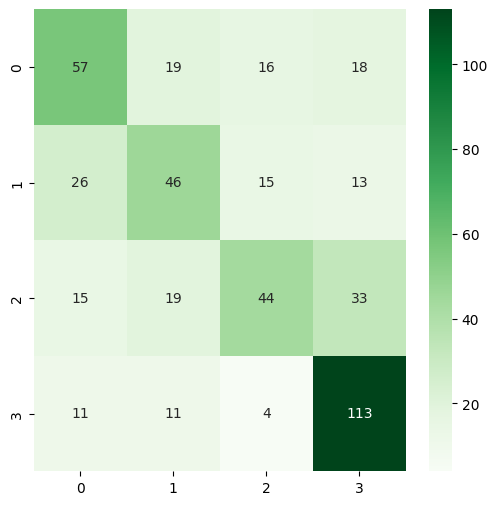

In [24]:
LR6 = LogisticRegression(penalty="l2", solver="sag", tol=0.1, max_iter=10000, random_state=0)
LR6.fit(X_train6,y_train6)
pred_LR6 = LR6.predict(X_test6)
Confusion_Matrix(confusion_matrix(y_test6,pred_LR6))
print(classification_report(y_test6, pred_LR6))
print(round(np.sum([y_test6==pred_LR6])/len(y_test6),4)*100,"%")
results.append(['images PCA 0.9', 'Logistic Regression',round(np.sum([y_test6==pred_LR6])/len(y_test6),4)*100 ])

In [25]:
import pickle
filenames = ['svm6.sav','knn6.sav','ada6.sav','RF6.sav','LR6.sav']
models= [svm6,neigh6,ada6,RF6,LR6]

for i in range(len(filenames)): 
    pickle.dump(models[i], open(filenames[i], 'wb'))

In [26]:
pca1=PCA(n_components=0.95)
X_train7=pca1.fit_transform(X_train)
X_test7=pca1.transform(X_test)
y_train7 = y_train
y_test7 = y_test

print(X_train7.shape)
print(X_test7.shape)

(1073, 311)
(460, 311)


# RUN ON DATA SET OF IMAGE PCA 0.95

#### SVM

In [27]:
losses = ["hinge","squared_hinge"]
penalties = ["l1","l2"]

print("OneVsOneClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OneVsOneClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train7, y_train7)
            pred_svm = svm.predict(X_test7)
            print(i,j,round(np.sum([y_test7==pred_svm])/len(y_test7),4)*100,"%")
        except:
            pass

print("OutputCodeClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OutputCodeClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train7, y_train7)
            pred_svm = svm.predict(X_test7)
            print(i,j,round(np.sum([y_test7==pred_svm])/len(y_test7),4)*100,"%")
        except:
            pass


print("OneVsRestClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OneVsRestClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train7, y_train7)
            pred_svm = svm.predict(X_test7)
            print(i,j,round(np.sum([y_test7==pred_svm])/len(y_test7),4)*100,"%")
        except:
            pass

OneVsOneClassifier
hinge l2 55.87 %
squared_hinge l2 55.87 %
OutputCodeClassifier
hinge l2 33.910000000000004 %
squared_hinge l2 43.26 %
OneVsRestClassifier
hinge l2 47.61 %
squared_hinge l2 47.61 %


              precision    recall  f1-score   support

           0       0.54      0.52      0.53       110
           2       0.50      0.59      0.54       100
           9       0.44      0.35      0.39       111
          11       0.68      0.73      0.71       139

    accuracy                           0.56       460
   macro avg       0.54      0.55      0.54       460
weighted avg       0.55      0.56      0.55       460

55.87 %


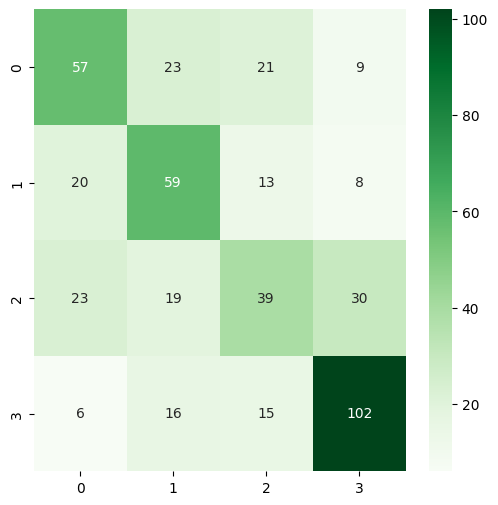

In [28]:
svm7 = OneVsOneClassifier(LinearSVC(random_state=0, loss="hinge",penalty="l2")).fit(X_train7, y_train7)
pred_svm7 = svm7.predict(X_test7)
Confusion_Matrix(confusion_matrix(y_test7,pred_svm7))
print(classification_report(y_test7, pred_svm7))
print(round(np.sum([y_test7==pred_svm7])/len(y_test7),4)*100,"%")
results.append(['images PCA 0.95', 'SVM',round(np.sum([y_test7==pred_svm7])/len(y_test7),4)*100 ])

#### KNN

In [29]:
for i in range(1,51):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train7,y_train7)
    pred_knn = neigh.predict(X_test7)
    print(i,round(np.sum([y_test7==pred_knn])/len(y_test7),4)*100,"%")

1 59.35 %
2 53.04 %
3 55.65 %
4 55.43 %
5 52.61 %
6 54.35 %
7 55.43 %
8 55.22 %
9 55.87 %
10 57.17 %
11 56.089999999999996 %
12 55.65 %
13 54.35 %
14 56.089999999999996 %
15 54.13 %
16 54.779999999999994 %
17 53.26 %
18 54.35 %
19 53.910000000000004 %
20 54.13 %
21 53.26 %
22 53.7 %
23 53.7 %
24 54.35 %
25 55.00000000000001 %
26 54.13 %
27 54.35 %
28 55.22 %
29 53.480000000000004 %
30 53.26 %
31 53.910000000000004 %
32 53.04 %
33 54.56999999999999 %
34 54.779999999999994 %
35 55.00000000000001 %
36 54.13 %
37 53.910000000000004 %
38 54.56999999999999 %
39 54.56999999999999 %
40 55.22 %
41 53.910000000000004 %
42 54.35 %
43 53.480000000000004 %
44 53.7 %
45 53.910000000000004 %
46 53.480000000000004 %
47 53.910000000000004 %
48 53.480000000000004 %
49 52.83 %
50 53.26 %


              precision    recall  f1-score   support

           0       0.56      0.55      0.55       110
           2       0.60      0.60      0.60       100
           9       0.53      0.44      0.48       111
          11       0.65      0.75      0.70       139

    accuracy                           0.59       460
   macro avg       0.58      0.58      0.58       460
weighted avg       0.59      0.59      0.59       460

59.35 %


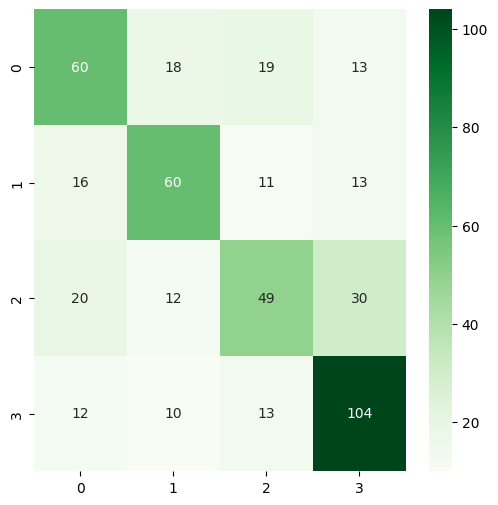

In [30]:
neigh7 = KNeighborsClassifier(n_neighbors=1)
neigh7.fit(X_train7,y_train7)
pred_knn7 = neigh7.predict(X_test7)
Confusion_Matrix(confusion_matrix(y_test7,pred_knn7))
print(classification_report(y_test7, pred_knn7))
print(round(np.sum([y_test7==pred_knn7])/len(y_test7),4)*100,"%")
results.append(['images PCA 0.95', 'KNN',round(np.sum([y_test7==pred_knn7])/len(y_test7),4)*100 ])

#### Adaboost

In [31]:
for i in range(50,2001,50):
    ada = AdaBoostClassifier(n_estimators=i, algorithm="SAMME", random_state=0)
    ada.fit(X_train7,y_train7)
    pred_ada = ada.predict(X_test7)
    print(i,round(np.sum([y_test7==pred_ada])/len(y_test7),4)*100,"%")

50 49.57 %
100 50.64999999999999 %
150 51.300000000000004 %
200 49.78 %
250 52.61 %
300 54.13 %
350 54.779999999999994 %
400 54.35 %
450 56.3 %
500 56.089999999999996 %
550 55.87 %
600 55.43 %
650 55.87 %
700 55.87 %
750 54.56999999999999 %
800 55.22 %
850 56.52 %
900 55.87 %
950 55.22 %
1000 55.87 %
1050 54.56999999999999 %
1100 55.87 %
1150 55.65 %
1200 57.17 %
1250 55.65 %
1300 55.43 %
1350 55.22 %
1400 55.87 %
1450 56.3 %
1500 57.17 %
1550 56.96 %
1600 56.96 %
1650 56.96 %
1700 56.3 %
1750 57.38999999999999 %
1800 55.65 %
1850 56.089999999999996 %
1900 54.779999999999994 %
1950 55.43 %
2000 54.56999999999999 %


              precision    recall  f1-score   support

           0       0.46      0.51      0.48       110
           2       0.56      0.44      0.49       100
           9       0.51      0.48      0.49       111
          11       0.72      0.80      0.76       139

    accuracy                           0.57       460
   macro avg       0.56      0.56      0.56       460
weighted avg       0.57      0.57      0.57       460

57.38999999999999 %


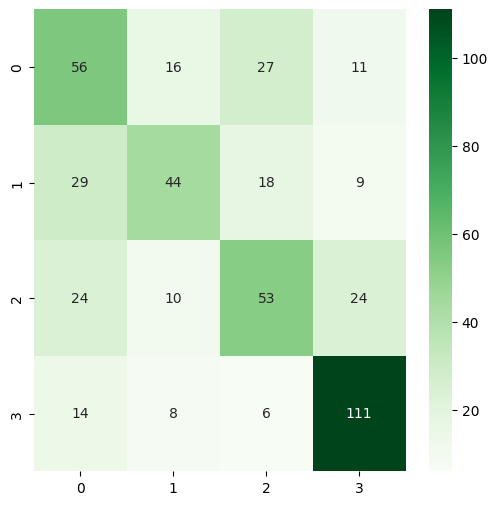

In [32]:
ada7 = AdaBoostClassifier(n_estimators=1750, algorithm="SAMME",random_state=0)
ada7.fit(X_train7,y_train7)
pred_ada7 = ada7.predict(X_test7)
Confusion_Matrix(confusion_matrix(y_test7,pred_ada7))
print(classification_report(y_test7, pred_ada7))
print(round(np.sum([y_test7==pred_ada7])/len(y_test7),4)*100,"%")
results.append(['images PCA 0.95', 'Adaboost',round(np.sum([y_test7==pred_ada7])/len(y_test7),4)*100 ])

#### Random Forest

In [33]:
for i in range(40,501,20):
    for j in range(2,5):
        RF = RandomForestClassifier(n_estimators=i, max_depth=None,min_samples_split=j, random_state=0)
        RF.fit(X_train7,y_train7)
        pred_RF = RF.predict(X_test7)
        print(i,j,round(np.sum([y_test7==pred_RF])/len(y_test7),4)*100,"%")

40 2 59.13 %
40 3 58.040000000000006 %
40 4 56.74 %
60 2 59.78 %
60 3 59.13 %
60 4 58.91 %
80 2 60.42999999999999 %
80 3 59.78 %
80 4 59.13 %
100 2 59.57 %
100 3 60.42999999999999 %
100 4 58.91 %
120 2 63.7 %
120 3 63.260000000000005 %
120 4 62.61 %
140 2 62.83 %
140 3 61.3 %
140 4 62.61 %
160 2 62.61 %
160 3 61.519999999999996 %
160 4 61.739999999999995 %
180 2 62.17 %
180 3 61.96 %
180 4 62.83 %
200 2 61.739999999999995 %
200 3 62.61 %
200 4 61.96 %
220 2 61.739999999999995 %
220 3 62.83 %
220 4 61.739999999999995 %
240 2 61.96 %
240 3 62.61 %
240 4 61.739999999999995 %
260 2 62.83 %
260 3 62.17 %
260 4 63.7 %
280 2 63.7 %
280 3 62.83 %
280 4 61.739999999999995 %
300 2 63.91 %
300 3 62.61 %
300 4 61.739999999999995 %
320 2 64.35 %
320 3 62.83 %
320 4 61.09 %
340 2 62.61 %
340 3 63.91 %
340 4 61.96 %
360 2 63.91 %
360 3 61.519999999999996 %
360 4 62.17 %
380 2 64.78 %
380 3 62.61 %
380 4 62.61 %
400 2 64.78 %
400 3 63.7 %
400 4 61.519999999999996 %
420 2 65.22 %
420 3 63.2600000000000

              precision    recall  f1-score   support

           0       0.52      0.68      0.59       110
           2       0.79      0.50      0.61       100
           9       0.68      0.58      0.62       111
          11       0.70      0.81      0.75       139

    accuracy                           0.65       460
   macro avg       0.67      0.64      0.65       460
weighted avg       0.67      0.65      0.65       460

65.42999999999999 %


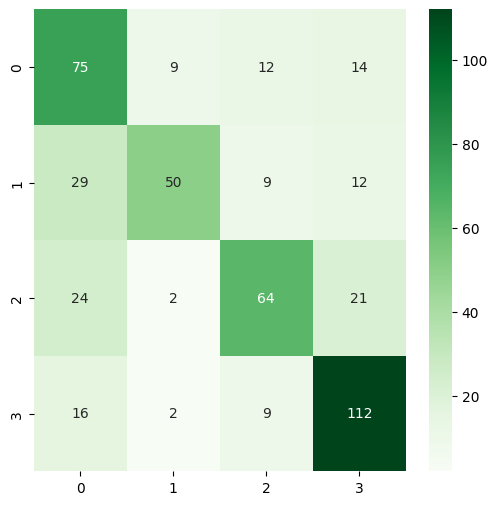

In [34]:
RF7 = RandomForestClassifier(n_estimators=480, max_depth=None,min_samples_split=2, random_state=0)
RF7.fit(X_train7,y_train7)
pred_RF7 = RF7.predict(X_test7)
Confusion_Matrix(confusion_matrix(y_test7,pred_RF7))
print(classification_report(y_test7, pred_RF7))
print(round(np.sum([y_test7==pred_RF7])/len(y_test7),4)*100,"%")
results.append(['images PCA 0.95', 'Random Forest',round(np.sum([y_test7==pred_RF7])/len(y_test7),4)*100 ])

#### Logistic Regression

In [35]:
penilties = ["l1","l2","elasticnet"]
solvers = ["lbfgs","liblinear","newton-cg","newton-cholesky","sag","saga"]
tols= [0.1 ,0.01, 0.001]

for i in penilties:
    for j in solvers:
        for k in tols:
            try:
                LR = LogisticRegression(penalty=i, solver=j, tol=k, max_iter=10000,random_state=0)
                LR.fit(X_train7,y_train7)
                pred_LR = LR.predict(X_test7)
                print(i,j,k,round(np.sum([y_test7==pred_LR])/len(y_test7),4)*100,"%")
            except:
                pass
        

l1 liblinear 0.1 53.910000000000004 %
l1 liblinear 0.01 53.7 %
l1 liblinear 0.001 52.83 %
l1 saga 0.1 57.38999999999999 %
l1 saga 0.01 55.65 %
l1 saga 0.001 55.00000000000001 %
l2 lbfgs 0.1 55.43 %
l2 lbfgs 0.01 54.779999999999994 %
l2 lbfgs 0.001 54.779999999999994 %
l2 liblinear 0.1 53.26 %
l2 liblinear 0.01 53.480000000000004 %
l2 liblinear 0.001 52.61 %
l2 newton-cg 0.1 54.35 %
l2 newton-cg 0.01 54.56999999999999 %
l2 newton-cg 0.001 54.56999999999999 %
l2 sag 0.1 57.830000000000005 %
l2 sag 0.01 53.26 %
l2 sag 0.001 55.00000000000001 %
l2 saga 0.1 57.38999999999999 %
l2 saga 0.01 55.65 %
l2 saga 0.001 55.00000000000001 %


              precision    recall  f1-score   support

           0       0.53      0.52      0.53       110
           2       0.52      0.51      0.52       100
           9       0.54      0.40      0.46       111
          11       0.66      0.82      0.73       139

    accuracy                           0.58       460
   macro avg       0.56      0.56      0.56       460
weighted avg       0.57      0.58      0.57       460

57.830000000000005 %


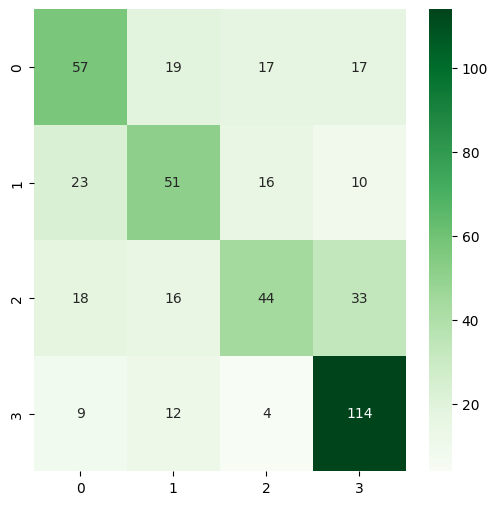

In [36]:
LR7 = LogisticRegression(penalty="l2", solver="sag", tol=0.1, max_iter=10000, random_state=0)
LR7.fit(X_train7,y_train7)
pred_LR7 = LR7.predict(X_test7)
Confusion_Matrix(confusion_matrix(y_test7,pred_LR7))
print(classification_report(y_test7, pred_LR7))
print(round(np.sum([y_test7==pred_LR7])/len(y_test7),4)*100,"%")
results.append(['images PCA 0.95', 'Logistic Regression',round(np.sum([y_test7==pred_LR7])/len(y_test7),4)*100 ])

In [37]:
cols = ["df_type","classifier","accuracy"]
df = pd.DataFrame(results, columns=cols)

In [38]:
df

,df_type,classifier,accuracy
0,images PCA 0.9,SVM,39.35
1,images PCA 0.9,KNN,60.43
2,images PCA 0.9,Adaboost,55.43
3,images PCA 0.9,Random Forest,66.96
4,images PCA 0.9,Logistic Regression,56.52
5,images PCA 0.95,SVM,55.87
6,images PCA 0.95,KNN,59.35
7,images PCA 0.95,Adaboost,57.39
8,images PCA 0.95,Random Forest,65.43
9,images PCA 0.95,Logistic Regression,57.83


In [39]:
import pickle
filenames = ['svm7.sav','knn7.sav','ada7.sav','RF7.sav','LR7.sav']
models= [svm7,neigh7,ada7,RF7,LR7]

for i in range(len(filenames)): 
    pickle.dump(models[i], open(filenames[i], 'wb'))